In [1]:
import numpy as np
import pandas as pd
#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\vijay\\GCET\\DiwaliSalesData.csv", encoding="unicode_escape")


In [3]:
df.shape


(11251, 15)

In [4]:
df.head(10)


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [8]:
pd.isnull(df).sum()


User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df.dropna(inplace = True)


In [10]:
pd.isnull(df).sum()


User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df["Amount"] = df ["Amount"]. astype("int")


In [12]:
df["Amount"].dtypes


dtype('int32')

In [13]:
df.columns


Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [14]:
df.rename(columns = {"Cust_name": "Customer_name", "Marital_Status": "Relationship_Status"}, inplace = True)


In [15]:
df.columns


Index(['User_ID', 'Customer_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Relationship_Status', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [16]:
df[["Orders","Amount"]].describe()


,Orders,Amount
count,11239.000000,11239.000000
mean,2.489634,9453.610553
std,1.114967,5222.355168
min,1.000000,188.000000
25%,2.000000,5443.000000
50%,2.000000,8109.000000
75%,3.000000,12675.000000
max,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

# Based on Gender

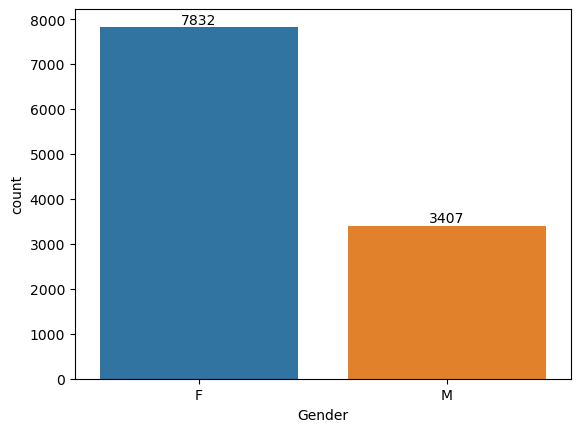

In [17]:
ax = sns.countplot(x = "Gender", data = df)

for bars in ax.containers:
    ax.bar_label(bars)

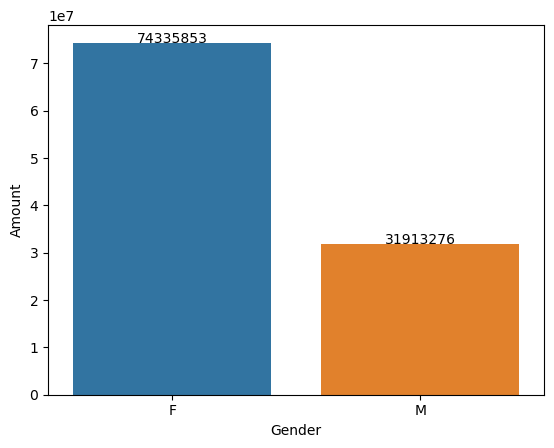

In [18]:
sales_gen = df.groupby(["Gender"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

ax = sns.barplot(x = "Gender", y = "Amount", data = sales_gen)

for index, row in sales_gen.iterrows():
    ax.text(index, row["Amount"], row["Amount"], ha="center")

# Based on Age

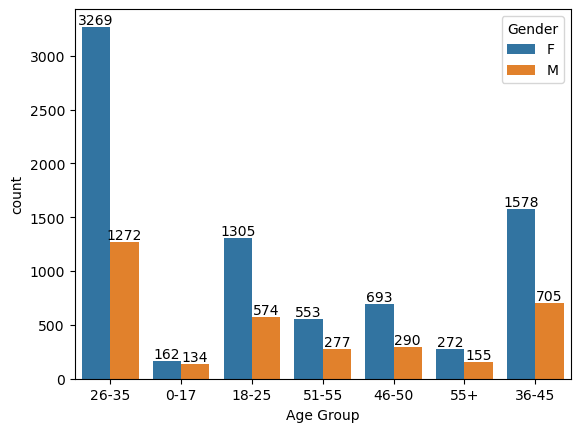

In [19]:
ax = sns.countplot(x = "Age Group", data = df, hue = "Gender")

for bars in ax.containers:
    ax.bar_label(bars)

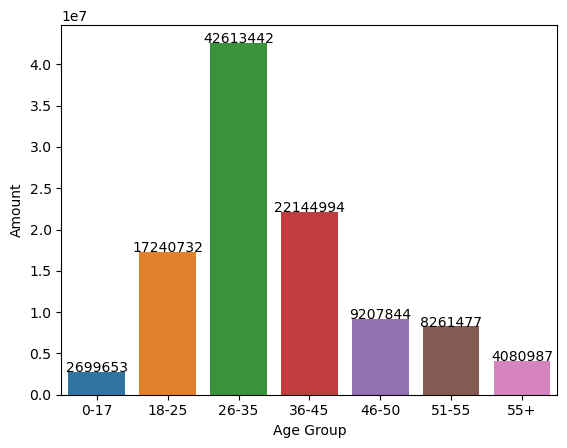

In [20]:
sales_age = df.groupby(["Age Group"], as_index = False) ["Amount"].sum().sort_values(by = "Age Group", ascending = True)

ax = sns.barplot(x = "Age Group", y = "Amount", data = sales_age)
sorted_age_labels = sales_age["Age Group"].tolist()
ax.set_xticklabels(sorted_age_labels)

for index, row in sales_age.iterrows():
    ax.text(sorted_age_labels.index(row["Age Group"]), row["Amount"], row["Amount"], ha="center")

# Based on States

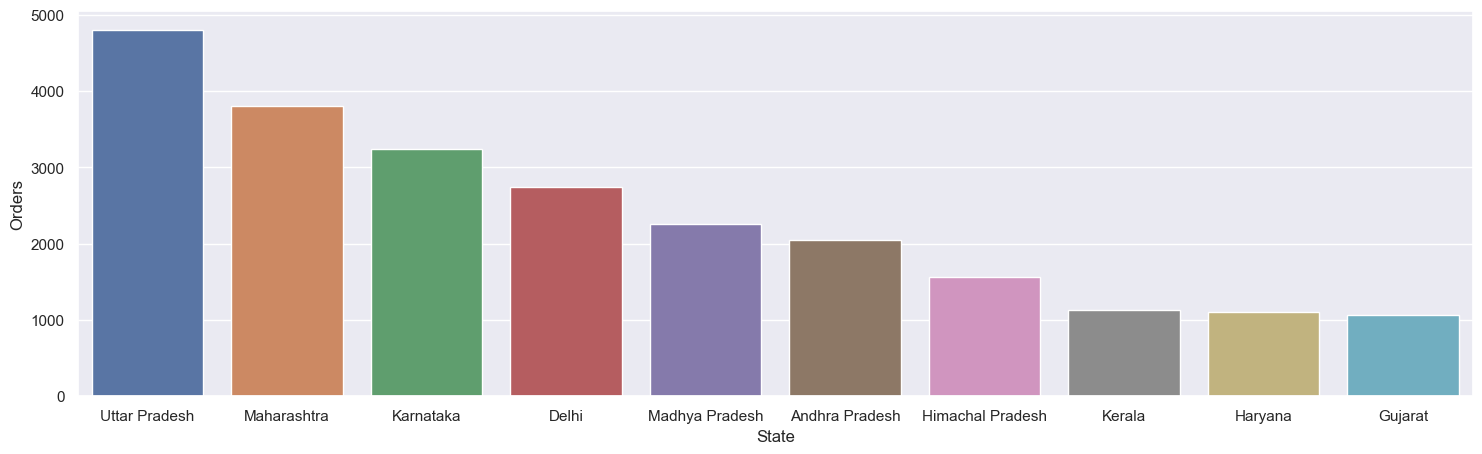

In [21]:
sales_state = df.groupby(["State"], as_index = False) ["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "State", y = "Orders", data = sales_state)

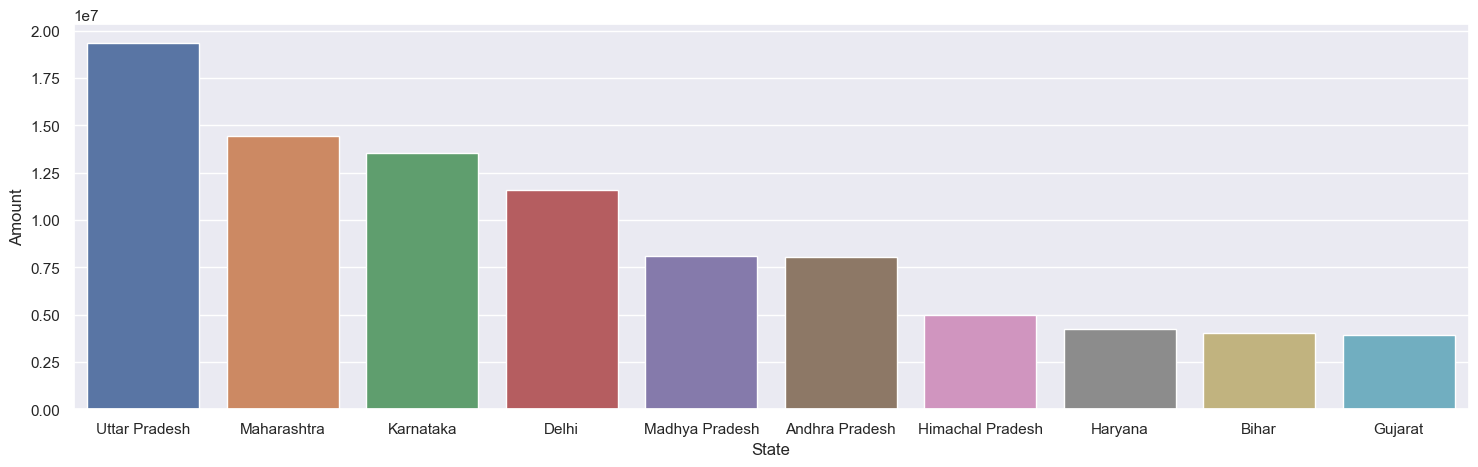

In [22]:
sales_state = df.groupby(["State"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "State", y = "Amount", data = sales_state)

# Based on Relationship Stats

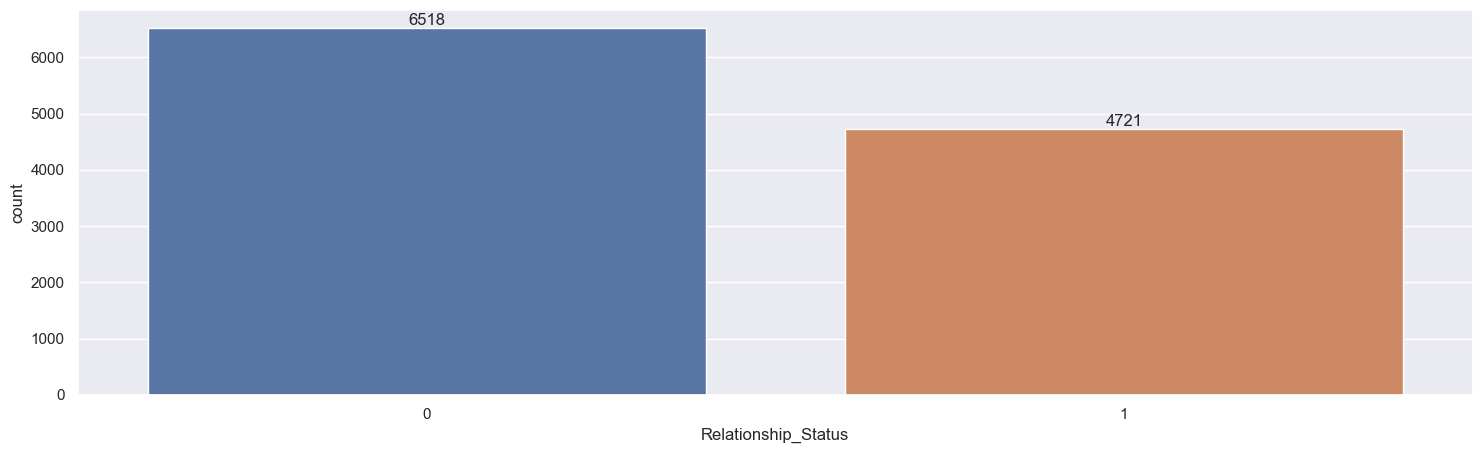

In [23]:
ax = sns.countplot(x = "Relationship_Status", data = df)

sns.set(rc={"figure.figsize":(8,5)})
for bars in ax.containers:
    ax.bar_label(bars)

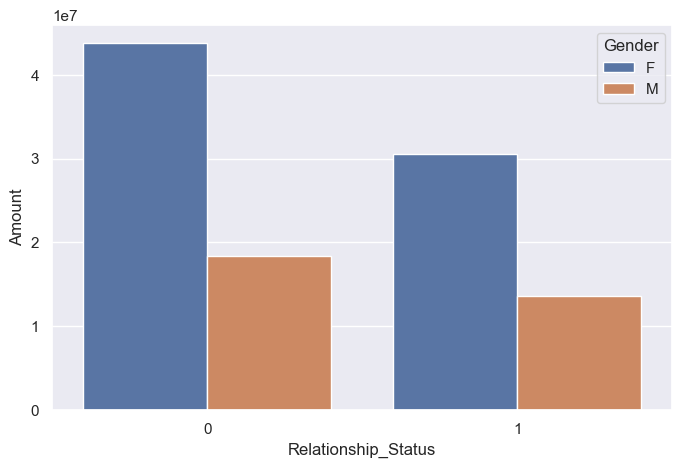

In [24]:
sales_state = df.groupby(["Relationship_Status", "Gender"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(8,5)})
ax = sns.barplot(x = "Relationship_Status", y = "Amount", data = sales_state, hue = "Gender")

# Based on Occupation

###### ax = sns.countplot(x = "Occupation", data = df)

sns.set(rc={"figure.figsize":(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

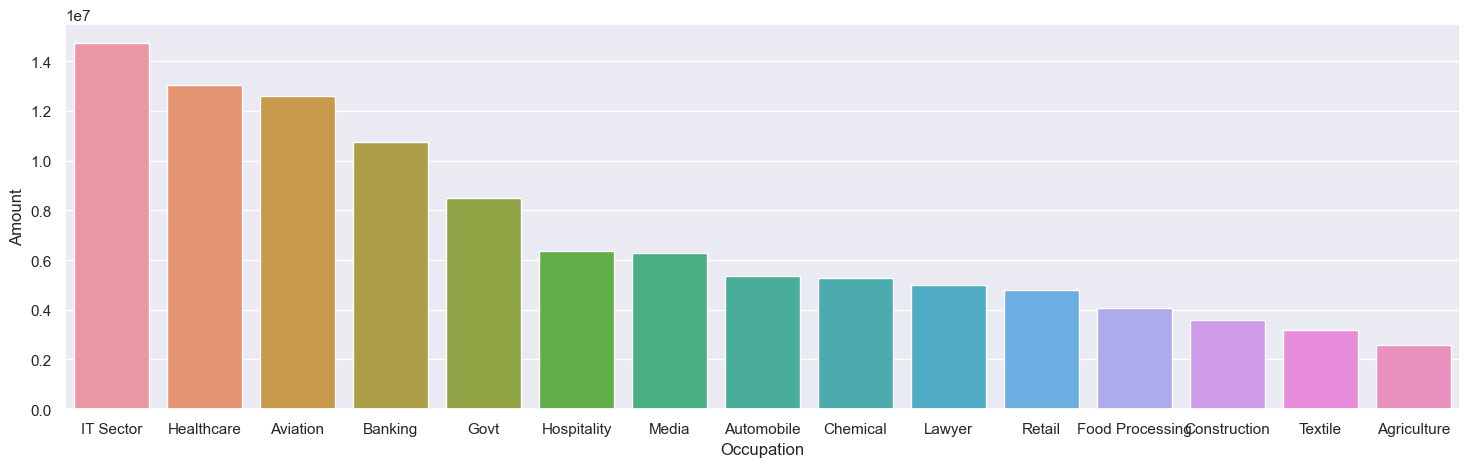

In [25]:
sales_state = df.groupby(["Occupation"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc={"figure.figsize":(18,5)})
ax = sns.barplot(x = "Occupation", y = "Amount", data = sales_state)

# Based on Product Category

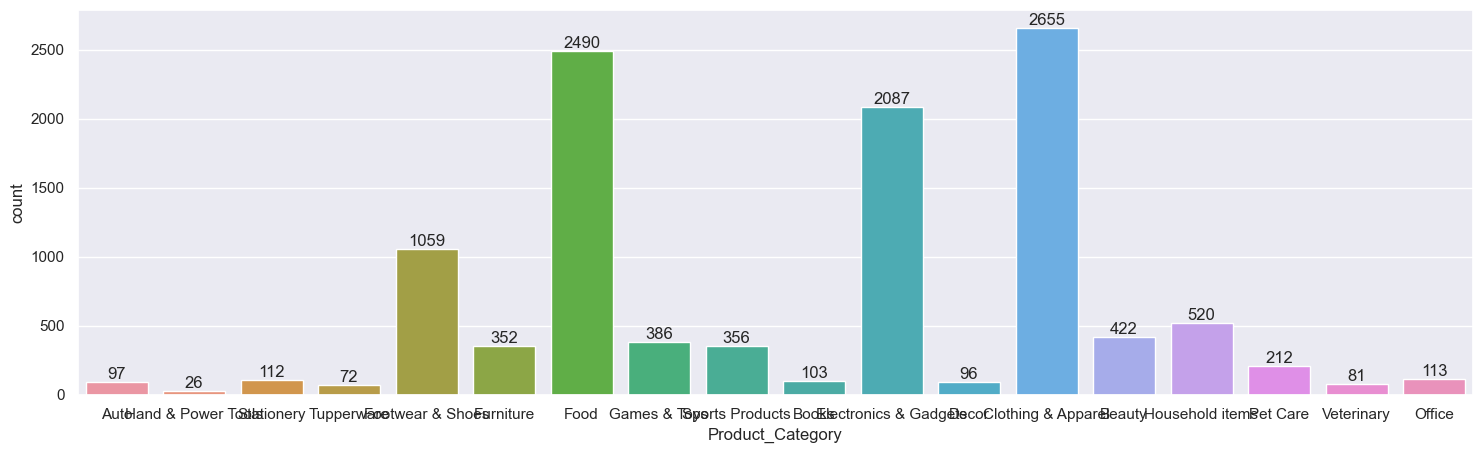

In [26]:
ax = sns.countplot(x = "Product_Category", data = df)

sns.set(rc={"figure.figsize":(50,8)})
for bars in ax.containers:
    ax.bar_label(bars)

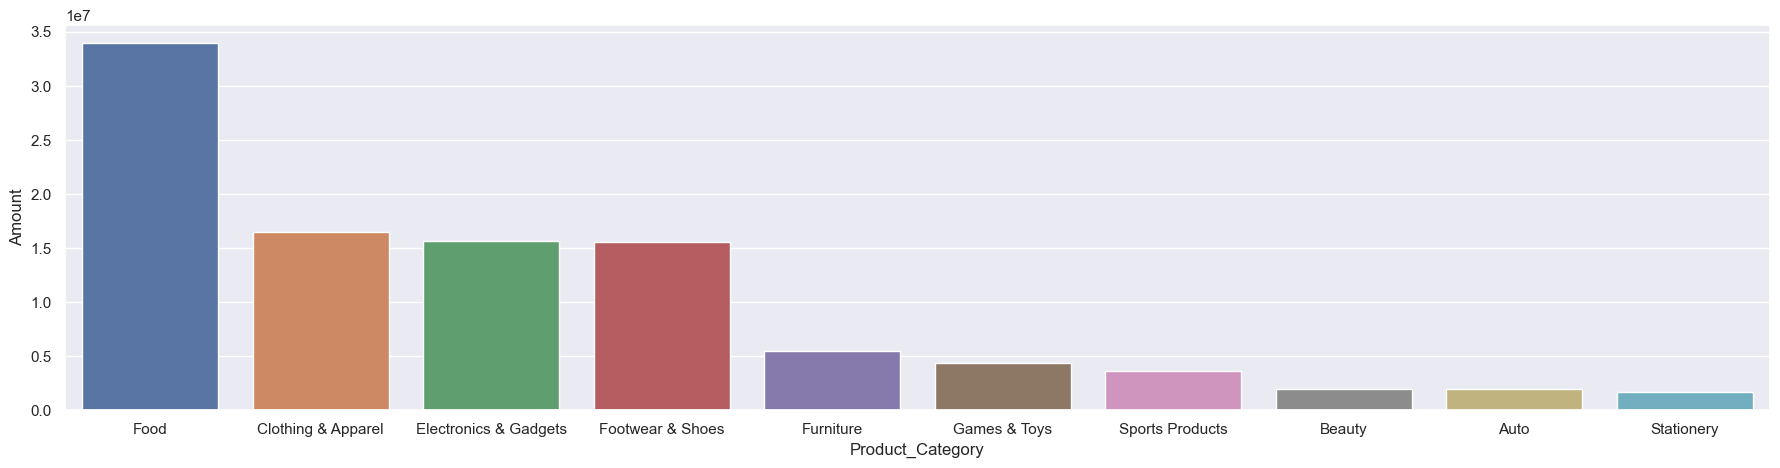

In [27]:
sales_state = df.groupby(["Product_Category"], as_index = False) ["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc={"figure.figsize":(22,5)})
ax = sns.barplot(x = "Product_Category", y = "Amount", data = sales_state)

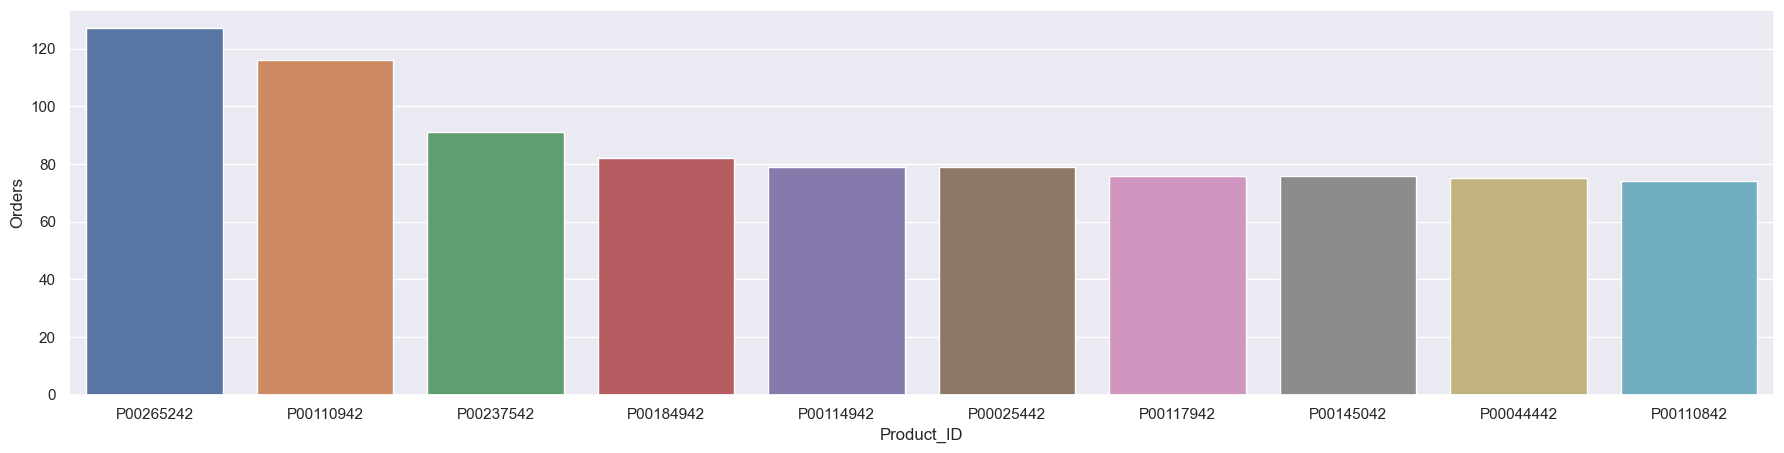

In [28]:
sales_state = df.groupby(["Product_ID"], as_index = False) ["Orders"].sum().sort_values(by = "Orders", ascending = False).head(10)

sns.set(rc={"figure.figsize":(22,5)})
ax = sns.barplot(x = "Product_ID", y = "Orders", data = sales_state)


C:\Users\vijay\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


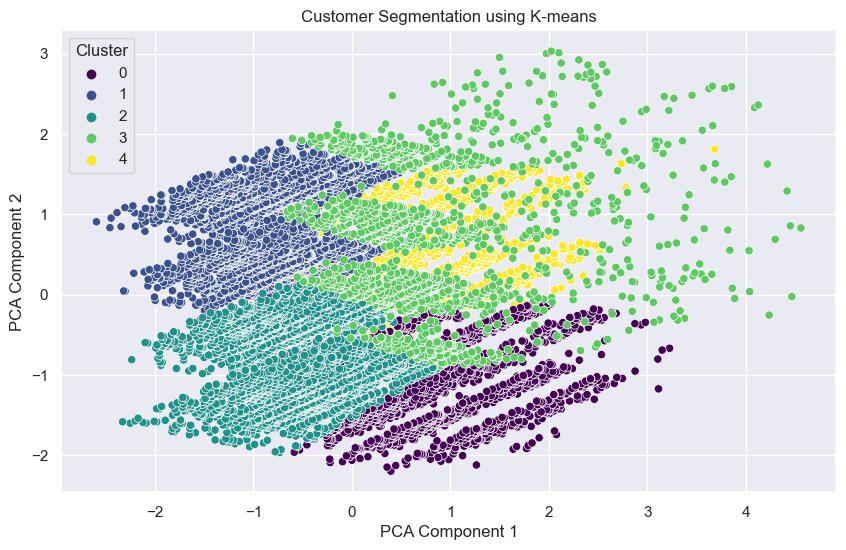

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select relevant features
features_for_clustering = ['Age', 'Orders', 'Amount']

# Standardize the features
scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(df[features_for_clustering])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)
# Apply K-means clustering
num_clusters = 5  # You can adjust this
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation using K-means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [30]:
cluster_counts = df['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

Cluster Counts:
Cluster
2    3092
1    2952
3    1785
0    1757
4    1653
Name: count, dtype: int64


In [31]:
print("\nSample of DataFrame with Cluster Assignments:")
print(df[['Age', 'Orders', 'Amount', 'Cluster']].head(10))


Sample of DataFrame with Cluster Assignments:
    Age  Orders  Amount  Cluster
0    28       1   23952        0
1    35       3   23934        4
2    35       3   23924        4
3    16       2   23912        0
4    28       2   23877        0
5    28       1   23877        0
6    25       4   23841        4
8    35       2   23809        0
9    26       4   23799        4
10   34       1   23770        0


In [32]:
df.drop(['Product_ID'], axis = 1, inplace = True)

In [33]:
df['Gender'].replace(['M','F'],[1,0],inplace=True)

In [34]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['Gender'] = lr.fit_transform(df['Gender'])
df['Age Group'] = lr.fit_transform(df['Age Group'])
df['State'] = lr.fit_transform(df['State'])
df['Zone'] = lr.fit_transform(df['Zone'])
df['Occupation'] = lr.fit_transform(df['Occupation'])
df['Product_Category'] = lr.fit_transform(df['Product_Category'])


In [35]:
df.drop(['Customer_name'], axis = 1, inplace = True)

In [36]:
df.drop(['User_ID'], axis = 1, inplace = True)

In [37]:
X = df.drop("Amount",axis=1)
y=df['Amount']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               11239 non-null  int64
 1   Age Group            11239 non-null  int32
 2   Age                  11239 non-null  int64
 3   Relationship_Status  11239 non-null  int64
 4   State                11239 non-null  int32
 5   Zone                 11239 non-null  int32
 6   Occupation           11239 non-null  int32
 7   Product_Category     11239 non-null  int32
 8   Orders               11239 non-null  int64
 9   Amount               11239 non-null  int32
 10  Cluster              11239 non-null  int32
dtypes: int32(7), int64(4)
memory usage: 746.3 KB


# Modeling
Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [40]:
lr.intercept_

8485.092022449944

In [41]:
lr.coef_

array([-177.00677553,  -45.03357163,   11.32895904, -145.69731422,
        -20.26317691,  -37.36192764,   -0.28656796,  159.99668348,
       -201.55591593,  271.12098726])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 4180.456413576122
Mean Squared Error: 27220086.413159378
R-squared: 0.009259480391323294


In [49]:
y_pred

array([10349.70028629,  9296.42700857,  9307.1285681 , ...,
        9060.70725964,  9449.78595491,  8893.02649222])

In [43]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  5217.28726573105


# DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
feature_importances = regressor.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.01014365 0.00397202 0.06457195 0.01253983 0.03016535 0.01483596
 0.04506237 0.12519802 0.0169049  0.67660596]


In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
dty_pred = regressor.predict(X_test)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, dty_pred)
mse = mean_squared_error(y_test, dty_pred)
r2 = r2_score(y_test, dty_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 2467.0099841834717
Mean Squared Error: 11183440.437854223
R-squared: 0.5929517848607608


In [48]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dty_pred)))

RMSE of Linear Regression Model is  3344.1651331616717


# Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  
RFregressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [52]:
feature_importances = RFregressor.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.00911845 0.0082141  0.06587692 0.01067003 0.02881146 0.01398027
 0.04464465 0.12730268 0.01597132 0.67541012]


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
rfy_pred = RFregressor.predict(X_test)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, rfy_pred)
mse = mean_squared_error(y_test, rfy_pred)
r2 = r2_score(y_test, rfy_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 1943.3497017219304
Mean Squared Error: 6151868.562660059
R-squared: 0.7760879460916198


In [68]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rfy_pred)))

RMSE of Linear Regression Model is  2480.2960635093664


# XGBoost Regressor

In [ ]:
pip install xgboost

In [58]:
from xgboost.sklearn import XGBRegressor

In [59]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [60]:
feature_importances = xgb_reg.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.00854894 0.00971512 0.0105169  0.00681231 0.00782491 0.00706793
 0.0074186  0.06568196 0.00806011 0.8683532 ]


In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
xgby_pred =xgb_reg.predict(X_test)

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, xgby_pred)
mse = mean_squared_error(y_test, xgby_pred)
r2xg = r2_score(y_test, xgby_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2xg)

Mean Absolute Error: 2087.473972758364
Mean Squared Error: 7061357.080950868
R-squared: 0.7429849238045948


In [67]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, xgby_pred)))

RMSE of Linear Regression Model is  2657.3214109232003


# SVM MODEL

In [63]:
from sklearn.svm import SVR

# Create an SVR object
svm_regressor = SVR(kernel='linear')  # You can choose different kernels based on your problem

# Fit the SVM model on the training data
svm_regressor.fit(X_train, y_train)

# Make predictions using the trained SVM model
y_pred_svm = svm_regressor.predict(X_test)

In [64]:
coefficients = svm_regressor.coef_.flatten()

# Display the coefficients for each feature
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

Gender: -8.724914052624811
Age Group: -15.714823827905093
Age: -3.6953607712283656
Relationship_Status: 5.109845769055113
State: 0.9776616243976832
Zone: -9.585042363666048
Occupation: 1.1348654488029695
Product_Category: 412.5753824461523
Orders: 33.703000792018706
Cluster: 199.47803632820393


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming svm_regressor is your trained SVM model and X_test_svm is the corresponding test set
svm_pred = svm_regressor.predict(X_test)

# Evaluate the model using regression metrics
mae_svm = mean_absolute_error(y_test, svm_pred)
mse_svm = mean_squared_error(y_test, svm_pred)
r2_svm = r2_score(y_test, svm_pred)

print("Mean Absolute Error (SVM):", mae_svm)
print("Mean Squared Error (SVM):", mse_svm)
print("R-squared (SVM):", r2_svm)

Mean Absolute Error (SVM): 4049.0773281200914
Mean Squared Error (SVM): 29554099.45834507
R-squared (SVM): -0.07569253857224578


In [66]:
from math import sqrt
print("RMSE of SVM Model is ",sqrt(mean_squared_error(y_test, svm_pred)))

RMSE of SVM Model is  5436.368223211621
